In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load** **Dataset**

In [2]:
df = pd.read_csv("placement.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [5]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


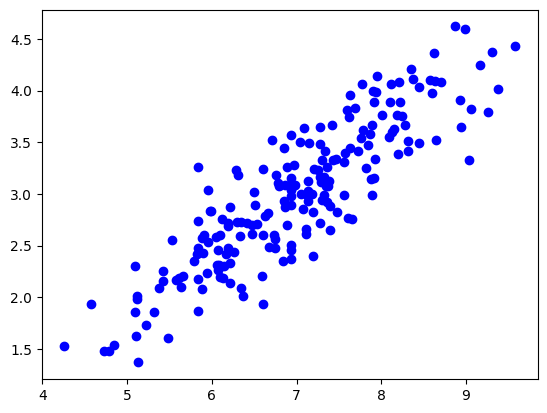

In [7]:
#lets check linearity assumption of data
# In simple linear regression their is only 1 input and 1 output (y=mx+c)
plt.scatter(df.cgpa,df.package,color="blue")

array([[<Axes: title={'center': 'cgpa'}>,
        <Axes: title={'center': 'package'}>]], dtype=object)

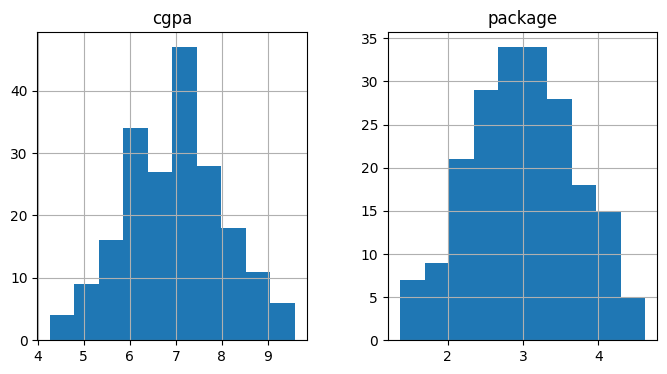

In [9]:
df.hist(figsize=(8,4))

# Seperate input and output

In [12]:
#in Ml Algorithm accepts input in 2D array only
#here lets create independent input coloumn(input is independent)
a = df[['cgpa']]
a[:5]

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [14]:
b = df.package
b[:5]

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

# **Training Phase of Data**

In [15]:
#import algorithm
from sklearn.linear_model import LinearRegression

In [16]:
#lets create object for model / call constructor
model = LinearRegression()

In [17]:
model

LinearRegression()

In [18]:
model.fit(a,b)   #Train data

LinearRegression()

In [21]:
#here we can check data score / validation
model.score(a,b)*100

77.5619225605115

# **Testing** **Phase**

In [39]:
model.predict([[5.12]]) #predicted package for 5.12 cgpa

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.93062948])

In [40]:
df.head(20)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48
8,6.09,2.31
9,8.31,3.51


In [47]:
# create test data
test_data = (a)
test_data

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [48]:
pred_data = model.predict(test_data) #predicted package on given test data
pred_data

array([2.93880607, 1.93062948, 3.46852598, 3.24068946, 2.96728564,
       3.50839737, 2.84767147, 2.85906329, 2.48313304, 3.74762571,
       2.04454774, 2.77932051, 4.10646823, 2.96158973, 3.41726276,
       3.14385894, 2.91032651, 2.07872322, 2.96728564, 3.27486494,
       3.16094668, 2.91602242, 2.5116126 , 2.54009217, 2.73375321,
       3.16094668, 3.74762571, 2.10150687, 2.39769434, 3.08689981,
       3.20651398, 3.62801154, 2.97867747, 2.63122678, 3.19512216,
       2.92741425, 2.42617391, 2.37491069, 3.92419901, 3.24638537,
       4.3570884 , 2.93880607, 2.40339026, 3.37739137, 1.91354174,
       3.49700554, 2.47174121, 2.34073522, 3.92989493, 4.06659684,
       4.47100666, 4.28873744, 3.78180119, 2.69957773, 2.92171834,
       3.68497067, 2.34073522, 2.7736246 , 2.95589381, 3.32043224,
       2.20972922, 2.13568235, 2.62553086, 4.23177831, 3.20651398,
       3.34321589, 1.92493357, 2.72236138, 3.32043224, 3.17233851,
       2.31225565, 3.26916903, 3.44574233, 3.82167258, 2.91602

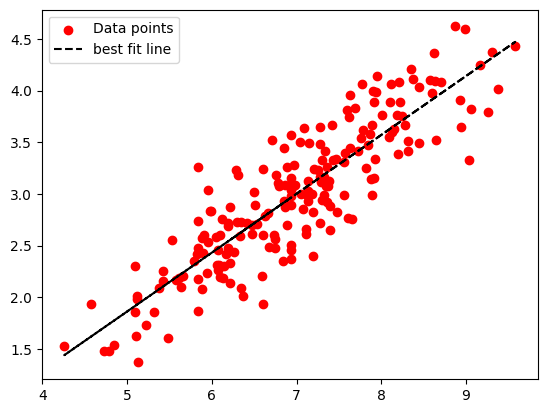

In [49]:
plt.scatter(a,b,color='red',label='Data points')
plt.plot(test_data,pred_data,'k--',label='best fit line')
plt.legend()

# **Measure Performance model of ML model**

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [52]:
new = df.sample(5)
new

,cgpa,package
54,6.86,3.09
33,6.35,2.73
157,6.47,2.70
2,7.82,3.25
39,7.43,3.33


In [53]:
# separate nw test input and test output
test_input = new[['cgpa']]
test_input

,cgpa
54,6.86
33,6.35
157,6.47
2,7.82
39,7.43


In [54]:
test_output = new.package
test_output

54     3.09
33     2.73
157    2.70
2      3.25
39     3.33
Name: package, dtype: float64

In [55]:
# now predict for new data in test input
p = model.predict(test_input)
p

array([2.92171834, 2.63122678, 2.69957773, 3.46852598, 3.24638537])

In [56]:
# now check error metrics
mean_absolute_error(test_output,p)

0.11392355243913946

In [57]:
mean_squared_error(test_output,p)

0.018564011152768532

In [58]:
# r2 score measure how best ur model is made
# r2 score value range is 0-1

In [60]:
r2_score(test_output,p)

0.7273206352413553